# Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
import pandas as pd
data = pd.read_csv('scitweets_export.tsv', sep='\t')
display(data.head())


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym 🏀💪,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


# 1-Classification

# 1.1-Import


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1.2-Decison tree


# 1.2.1-SCIEN vs NOT SCIEN


Distribution des classes :
science_related
0    765
1    375
Name: count, dtype: int64


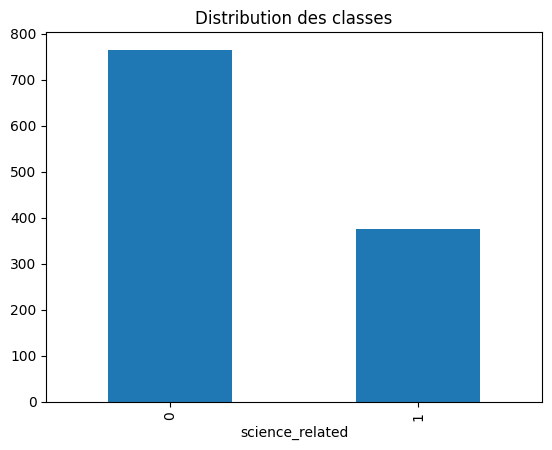


Accuracy: 0.7192982456140351

Confusion Matrix:
 [[133  13]
 [ 51  31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.91      0.81       146
           1       0.70      0.38      0.49        82

    accuracy                           0.72       228
   macro avg       0.71      0.64      0.65       228
weighted avg       0.72      0.72      0.69       228



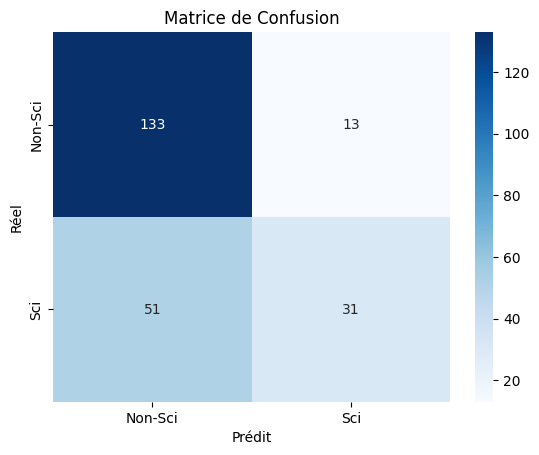


Exemples mal classés :
                                                   text  actual  predicted
1040  @chuckwoolery Yes me, too. Ventilation can be ...       1          0
917   @Hodson_Group @TheMooreLab This is true (I’m b...       1          0
86    The Biology of Belief: Unleashing the Power of...       1          0
824   #OVER #HORIZON #RADAR could help to produce fa...       1          0
613   Why the definition of polycystic ovary syndrom...       1          0
429   The Strange, Familiar, and Forgotten — fascina...       1          0
101   Determination leads to Success. Best day of my...       1          0
717   How to gain twice as much as your opponent in ...       1          0
275   #WeightLoss #Program Conquering The Excess Wei...       0          1
528   Harvard research estimates #ACA repeal will ca...       1          0


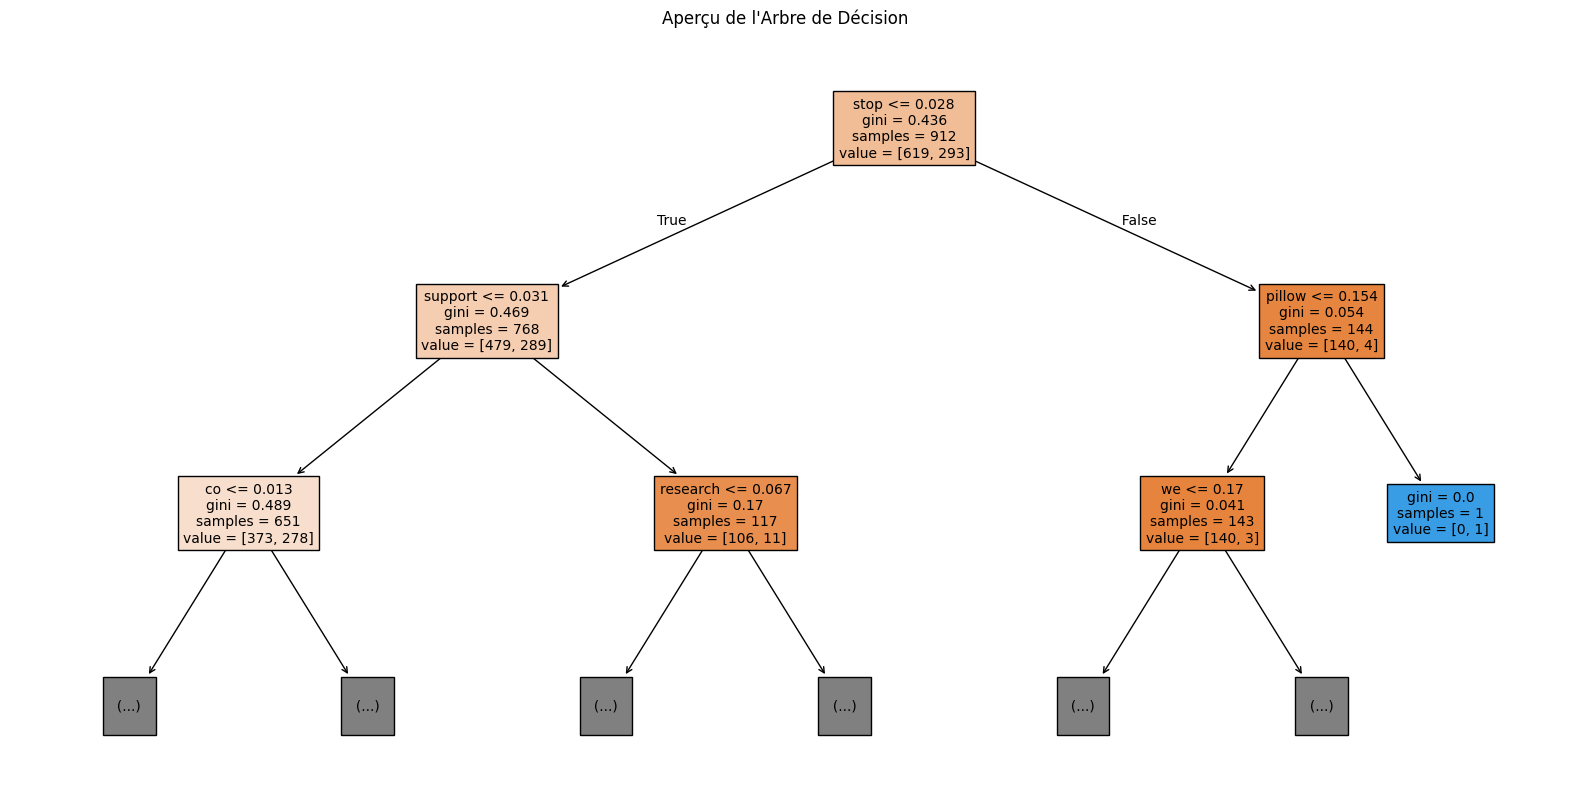

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Charger les données et préparer ---
data.columns = data.columns.str.strip()
X = data[['text']]
y = data['science_related']

# Voir la distribution des classes
print("Distribution des classes :")
print(y.value_counts())
y.value_counts().plot(kind='bar', title='Distribution des classes')
plt.show()

# --- 2. Split et vectorisation ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train['text'])
X_test_vect = vectorizer.transform(X_test['text'])

# --- 3. Entraînement du modèle ---
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train_vect, y_train)

# --- 4. Prédictions ---
y_pred = model.predict(X_test_vect)

# --- 5. Évaluation ---
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 6. Matrice de confusion graphique ---
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Sci", "Sci"], yticklabels=["Non-Sci", "Sci"])
plt.xlabel('Prédit')
plt.ylabel('Réel')
plt.title('Matrice de Confusion')
plt.show()

# --- 7. Affichage des erreurs ---
X_test_df = X_test.copy()
X_test_df['actual'] = y_test.values
X_test_df['predicted'] = y_pred
misclassified = X_test_df[X_test_df['actual'] != X_test_df['predicted']]
print("\nExemples mal classés :")
print(misclassified[['text', 'actual', 'predicted']].head(10))

# --- 8. Visualiser un petit bout de l’arbre ---
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=2, fontsize=10, feature_names=vectorizer.get_feature_names_out())
plt.title("Aperçu de l'Arbre de Décision")
plt.show()


# 1.2.2-Classification en 2 categorie

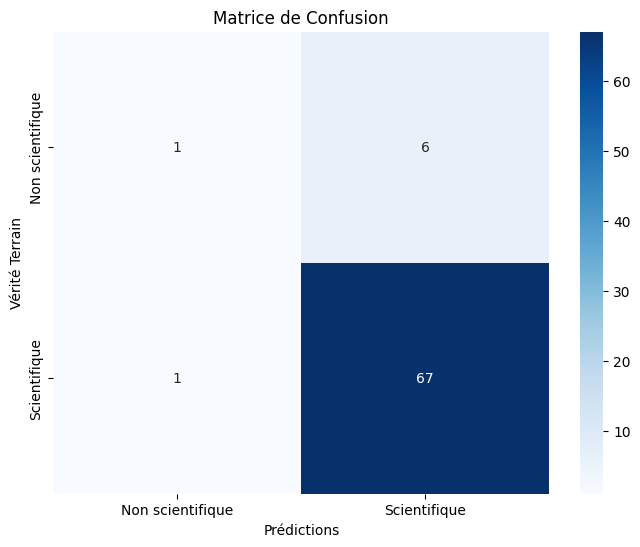

                                                   text  True  Predicted
704   From March 5 - 9 @FieldsInstitute's workshop o...     0          1
329   George #Boole Boolean logic inventor b OTD 181...     0          1
1002  Freeman J. Dyson, a mathematical prodigy who l...     0          1
1130  This looks like a great opportunity to get res...     0          1
350   VIDEO: Dr. Keith Flaherty talks about the gene...     0          1


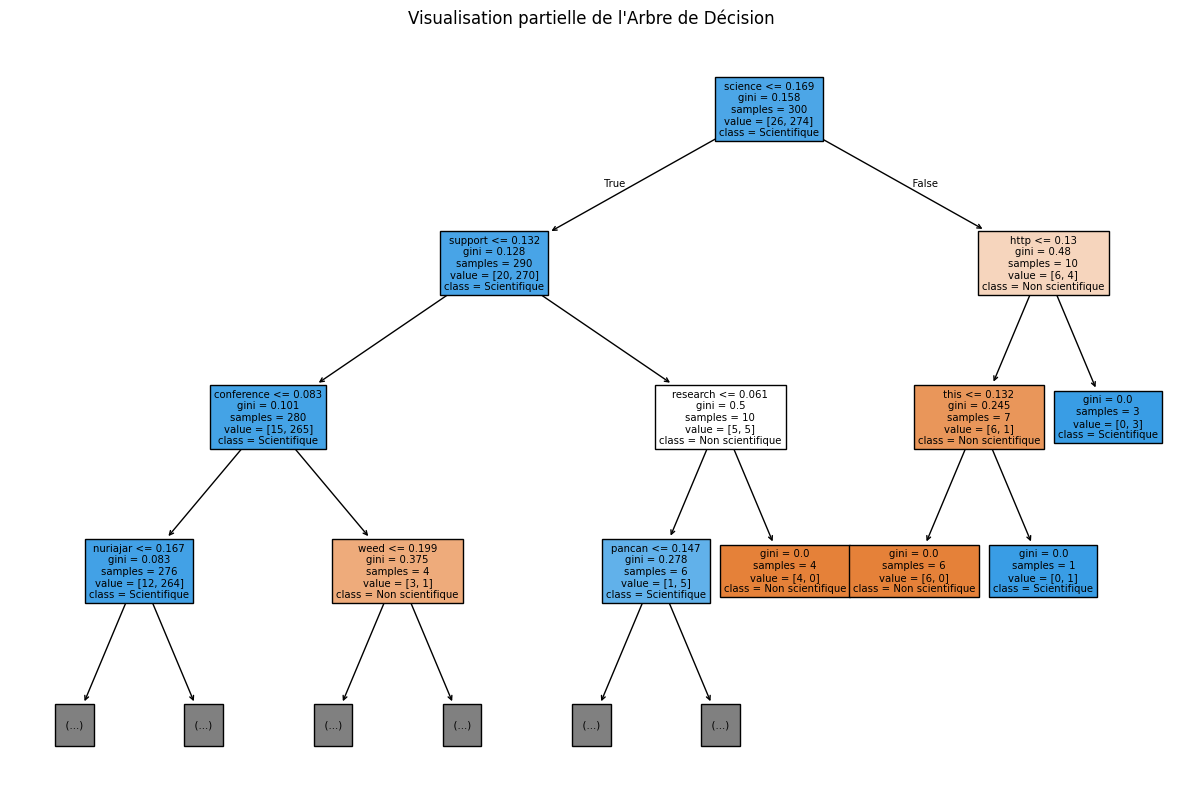

Accuracy: 0.9066666666666666

Confusion Matrix:
 [[ 1  6]
 [ 1 67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22         7
           1       0.92      0.99      0.95        68

    accuracy                           0.91        75
   macro avg       0.71      0.56      0.59        75
weighted avg       0.88      0.91      0.88        75



In [8]:
# Importation des bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Filtrage des tweets liés à la science
sci_tweets = data[data['science_related'] == 1].copy()

# Création de la cible : CLAIM ou REF = 1 ; CONTEXT = 0
sci_tweets['claim_or_ref'] = ((sci_tweets['scientific_claim'] == 1) | (sci_tweets['scientific_reference'] == 1)).astype(int)

# Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(
    sci_tweets["text"], sci_tweets["claim_or_ref"], test_size=0.2, random_state=42
)

# Vectorisation du texte
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Entraînement du modèle
model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train)

# Prédiction
y_pred = model.predict(X_test_vec)

# 1. Affichage de la matrice de confusion avec seaborn
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non scientifique', 'Scientifique'], yticklabels=['Non scientifique', 'Scientifique'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vérité Terrain')
plt.show()

# 2. Affichage des erreurs de classification
misclassified = sci_tweets.loc[X_test.index, :]
misclassified['Predicted'] = y_pred
misclassified['True'] = y_test
misclassified = misclassified[misclassified['True'] != misclassified['Predicted']]

# Afficher quelques erreurs
print(misclassified[['text', 'True', 'Predicted']].head())


# 3. Visualisation partielle de l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=['Non scientifique', 'Scientifique'], max_depth=3)
plt.title('Visualisation partielle de l\'Arbre de Décision')
plt.show()

# Évaluation du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 1.2.3-Classification en 3 categorie






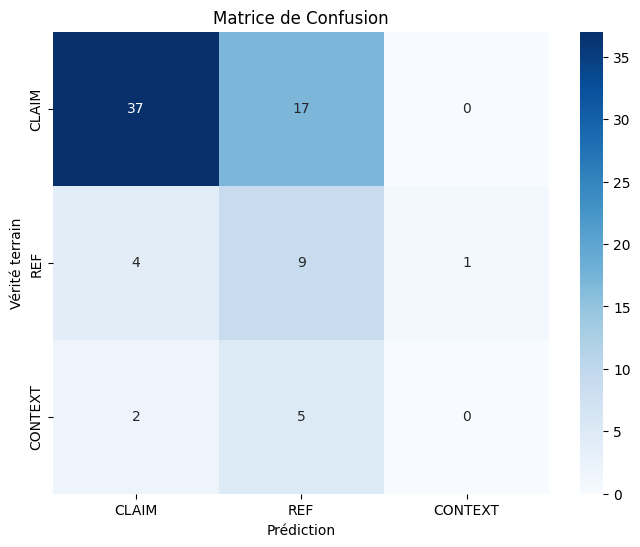


Erreurs de classification (exemples) :
                                                  text   True Predicted
506  RT BBCScienceNews: Database helps plant 'right...  CLAIM       REF
248  Companies report 48% increase in attempted cyb...  CLAIM       REF
367  #Severe fibromyalgia symptoms linked to obesit...  CLAIM       REF
869  BioTechnology – Efficient Stem Cells Can Grow ...  CLAIM       REF
895  Kefir Health Benefits: Kefir Milk Grains last ...  CLAIM       REF


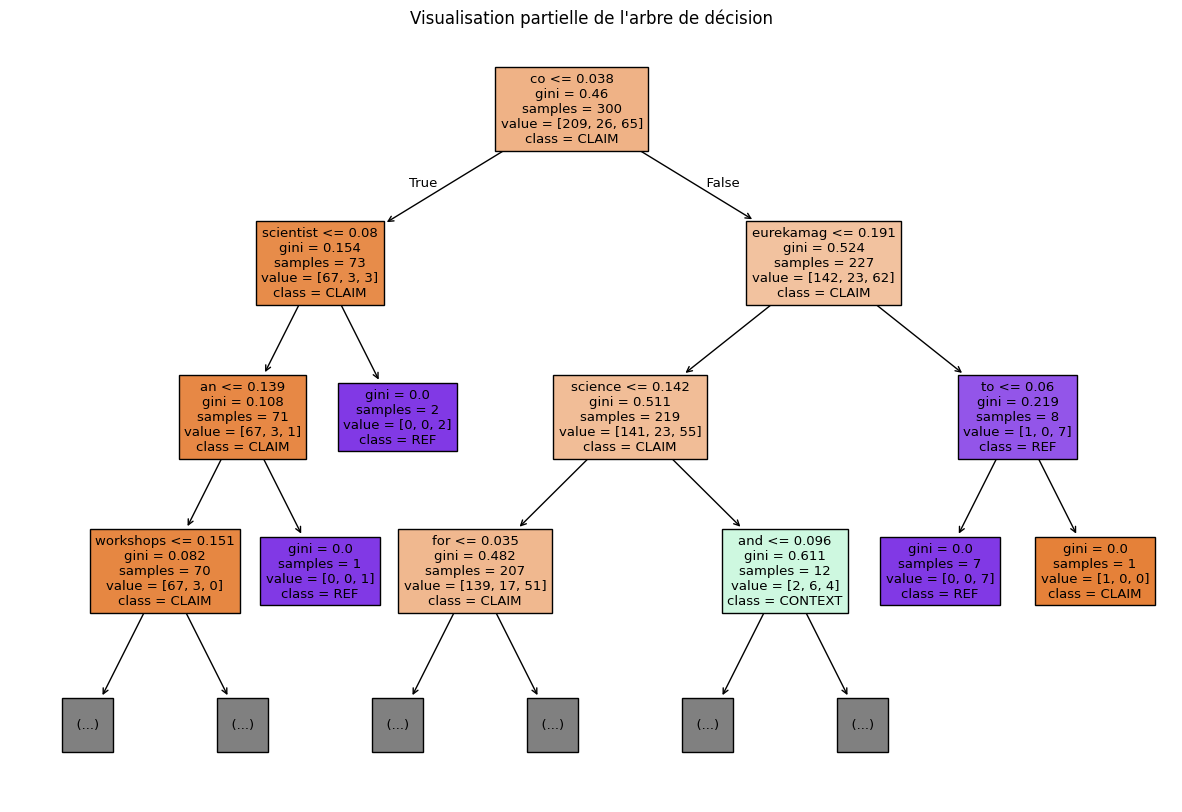

Accuracy: 0.6133333333333333

Classification Report:
               precision    recall  f1-score   support

       CLAIM       0.86      0.69      0.76        54
     CONTEXT       0.00      0.00      0.00         7
         REF       0.29      0.64      0.40        14

    accuracy                           0.61        75
   macro avg       0.38      0.44      0.39        75
weighted avg       0.67      0.61      0.62        75



In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier

# 1. Préparation des données
sci_tweets = data[data['science_related'] == 1].copy()
sci_tweets['category'] = 'CONTEXT'
sci_tweets.loc[sci_tweets['scientific_reference'] == 1, 'category'] = 'REF'
sci_tweets.loc[sci_tweets['scientific_claim'] == 1, 'category'] = 'CLAIM'

# 2. Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(
    sci_tweets["text"], sci_tweets["category"], test_size=0.2, random_state=42
)

# 3. Vectorisation
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Entraînement du modèle
model = DecisionTreeClassifier()
model.fit(X_train_vec, y_train)

# 5. Prédictions
y_pred = model.predict(X_test_vec)

# 6. Matrice de confusion visuelle
cm = confusion_matrix(y_test, y_pred, labels=['CLAIM', 'REF', 'CONTEXT'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['CLAIM', 'REF', 'CONTEXT'],
            yticklabels=['CLAIM', 'REF', 'CONTEXT'])
plt.title('Matrice de Confusion')
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.show()

# 7. Affichage des erreurs de classification
# Associer les prédictions et vraies valeurs aux textes
X_test_df = sci_tweets.loc[X_test.index].copy()
X_test_df['Predicted'] = y_pred
X_test_df['True'] = y_test
misclassified = X_test_df[X_test_df['Predicted'] != X_test_df['True']]

# Afficher quelques exemples
print("\nErreurs de classification (exemples) :")
print(misclassified[['text', 'True', 'Predicted']].head())

# 8. Visualisation partielle de l'arbre de décision
plt.figure(figsize=(15, 10))
plot_tree(model, filled=True, feature_names=vectorizer.get_feature_names_out(),
          class_names=model.classes_, max_depth=3)
plt.title("Visualisation partielle de l'arbre de décision")
plt.show()

# 9. Résultats globaux
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Afficher les features les plus importantes (mots clés)


<ipython-input-10-7fd0453650bf>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_features, palette="viridis")


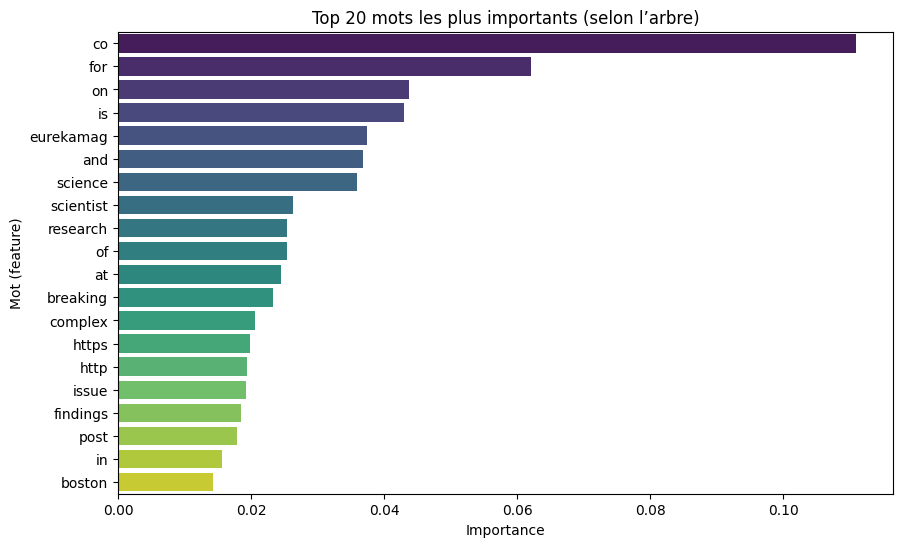

In [10]:
import numpy as np

# Obtenir les importances
feature_importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Top 20 mots les plus importants
top_indices = np.argsort(feature_importances)[::-1][:20]
top_features = feature_names[top_indices]
top_scores = feature_importances[top_indices]

# Affichage en barplot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_scores, y=top_features, palette="viridis")
plt.title("Top 20 mots les plus importants (selon l’arbre)")
plt.xlabel("Importance")
plt.ylabel("Mot (feature)")
plt.show()


 2. Visualisation complète de l’arbre avec Graphviz (facultatif mais plus lisible)

In [11]:
!pip install graphviz
!apt-get install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


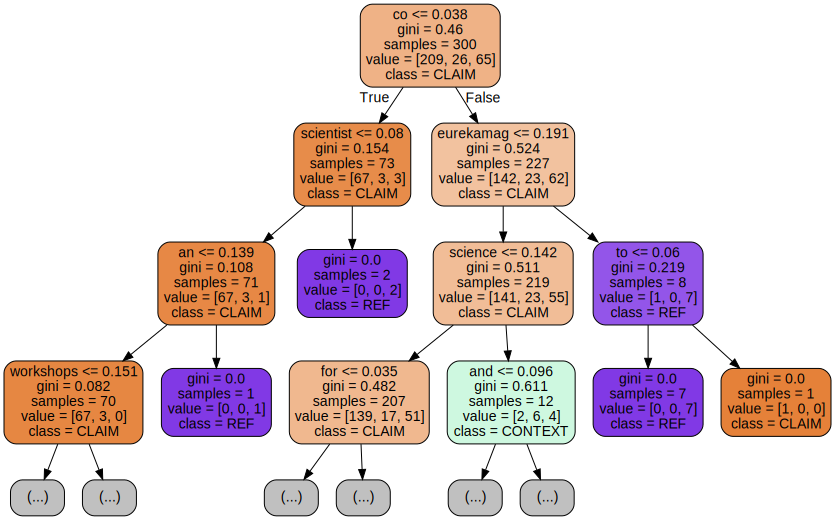

In [12]:
from sklearn.tree import export_graphviz
import graphviz

# Exporter l’arbre au format DOT
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=vectorizer.get_feature_names_out(),
    class_names=model.classes_,
    filled=True,
    rounded=True,
    max_depth=3  # Tu peux augmenter si tu veux plus de détails
)

# Affichage avec graphviz
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format='png', cleanup=True)  # Enregistre une image PNG
graph  # Affiche dans le notebook




# 2-Ingenieurie des donnees





# 2.1- Fonction qui remplace les emoji par des chaînes de caractères

In [13]:
!pip install emoji


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 10.8 MB/s eta 0:00:00


In [14]:
import emoji

In [15]:
def replace_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [16]:
data['text'] = data['text'].apply(replace_emojis)
display(data.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,Knees are a bit sore. i guess that's a sign th...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonald's breakfast stop then the gym basket...,0,0.0,0.0,0.0
2,2,322030931022065664,Can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,Couch-lock highs lead to sleeping in the couch...,1,1.0,0.0,0.0
4,4,328524426658328576,Does daily routine help prevent problems with ...,1,1.0,0.0,0.0


# 2.2- Fonction qui retire les ponctuations et les hashtags

In [17]:
import re
def clean_punct(text):
    #retirer les hashtags
    text = re.sub(r'#\w+', '', text)
    #retirer les mentions
    text = re.sub(r'@\w+', '', text)
    #retirer la ponctuation
    text = re.sub(r'[^\w\s]', '', text)
    #retirer les espaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

In [18]:
data['text'] = data['text'].apply(clean_punct)
print(data[['text']])

                                                   text
0     Knees are a bit sore i guess thats a sign that...
1     McDonalds breakfast stop then the gym basketba...
2     Can any Gynecologist with Cancer Experience ex...
3     Couchlock highs lead to sleeping in the couch ...
4     Does daily routine help prevent problems with ...
...                                                 ...
1135  Im sorry but we DO NOT have 14 of million dead...
1136  Dear applicants you can kindly download the en...
1137          Whats the uber support team email address
1138  House passes bill to increase stimulus checks ...
1139  Renjun deserve better treatment please treat R...

[1140 rows x 1 columns]


# 2.3- Fonction qui lemmatise

In [19]:
!pip install spacy

In [20]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 27.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [21]:
!pip uninstall -y torch torchvision torchaudio spacy

Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5


In [22]:
!pip install --no-cache-dir torch torchvision torchaudio spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 133.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 145.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 92.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 138.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 126.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 120.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [23]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
import spacy
nlp = spacy.load("en_core_web_sm")
def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

In [ ]:
data['text'] = data['text'].apply(lemmatize_text)
display(data.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knee be a bit sore I guess that s a sign that ...,0,0.0,0.0,0.0
1,1,319090866545385472,McDonalds breakfast stop then the gym basketba...,0,0.0,0.0,0.0
2,2,322030931022065664,can any Gynecologist with Cancer Experience ex...,1,1.0,0.0,0.0
3,3,322694830620807168,couchlock high lead to sleep in the couch get ...,1,1.0,0.0,0.0
4,4,328524426658328576,do daily routine help prevent problem with bip...,1,1.0,0.0,0.0


# 2.4- Fonction qui retire les StopWords

In [ ]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    """
    Supprime les stop words d'un texte.

    :param text: str - Le texte d'entrée (un tweet dans ce cas).
    :return: str - Le texte nettoyé sans stop words.
    """
    words = text.split()  # Tokenisation simple
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['text'] = data['text'].apply(remove_stopwords)
display(data.head())

,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knee bit sore guess sign recent treadmilling work,0,0.0,0.0,0.0
1,1,319090866545385472,McDonalds breakfast stop gym basketball flexed...,0,0.0,0.0,0.0
2,2,322030931022065664,Gynecologist Cancer Experience explain danger ...,1,1.0,0.0,0.0
3,3,322694830620807168,couchlock high lead sleep couch get stop shit,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problem bipolar dis...,1,1.0,0.0,0.0


In [ ]:
def clean_data(data, column_name):
    """Apply all text cleaning functions in sequence to a specified column."""
    data[column_name] = data[column_name].apply(lambda text: remove_stopwords(lemmatize_text(clean_punct(replace_emojis(text)))))
    return data
data = clean_data(data, 'text')
display(data.head())


,Unnamed: 0,tweet_id,text,science_related,scientific_claim,scientific_reference,scientific_context
0,0,316669998137483264,knee bit sore guess sign recent treadmilling work,0,0.0,0.0,0.0
1,1,319090866545385472,McDonalds breakfast stop gym basketball flexed...,0,0.0,0.0,0.0
2,2,322030931022065664,Gynecologist Cancer Experience explain danger ...,1,1.0,0.0,0.0
3,3,322694830620807168,couchlock high lead sleep couch get stop shit,1,1.0,0.0,0.0
4,4,328524426658328576,daily routine help prevent problem bipolar dis...,1,1.0,0.0,0.0


# 3-Classification multi-classe à 2 catégories

Accuracy: 0.84


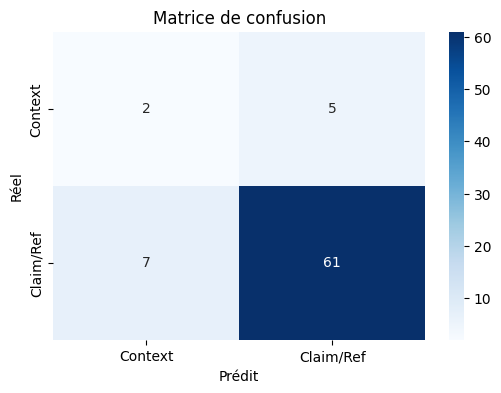


Classification Report:
               precision    recall  f1-score   support

     Context       0.22      0.29      0.25         7
   Claim/Ref       0.92      0.90      0.91        68

    accuracy                           0.84        75
   macro avg       0.57      0.59      0.58        75
weighted avg       0.86      0.84      0.85        75


Exemples de tweets mal classés :
                                                   text  true  pred
1040  @chuckwoolery Yes me, too. Ventilation can be ...     1     0
329   George #Boole Boolean logic inventor b OTD 181...     0     1
541   Innovation - Infection Control - Mathematics s...     1     0
239   Cassini confirms hydrothermal activity in ocea...     1     0
1130  This looks like a great opportunity to get res...     0     1


<ipython-input-28-97b107392676>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_values, y=top_features, palette="viridis")


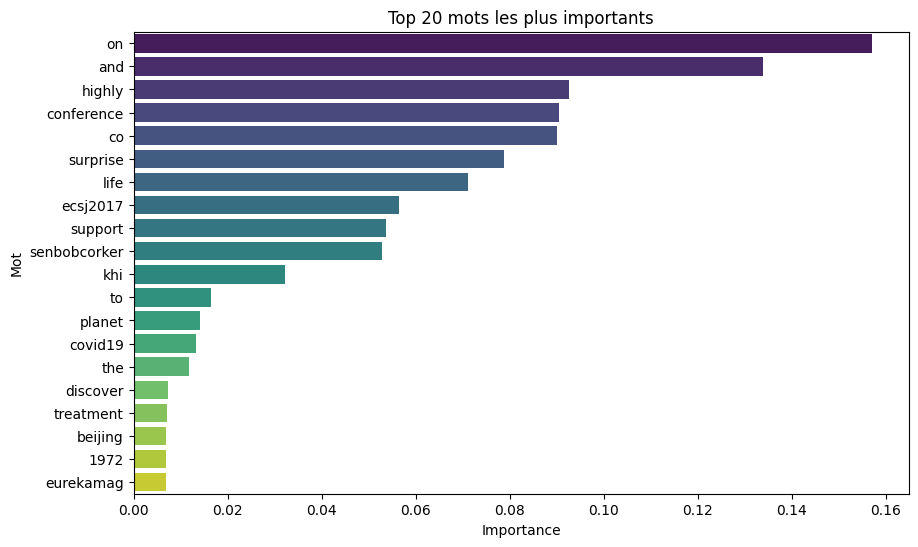

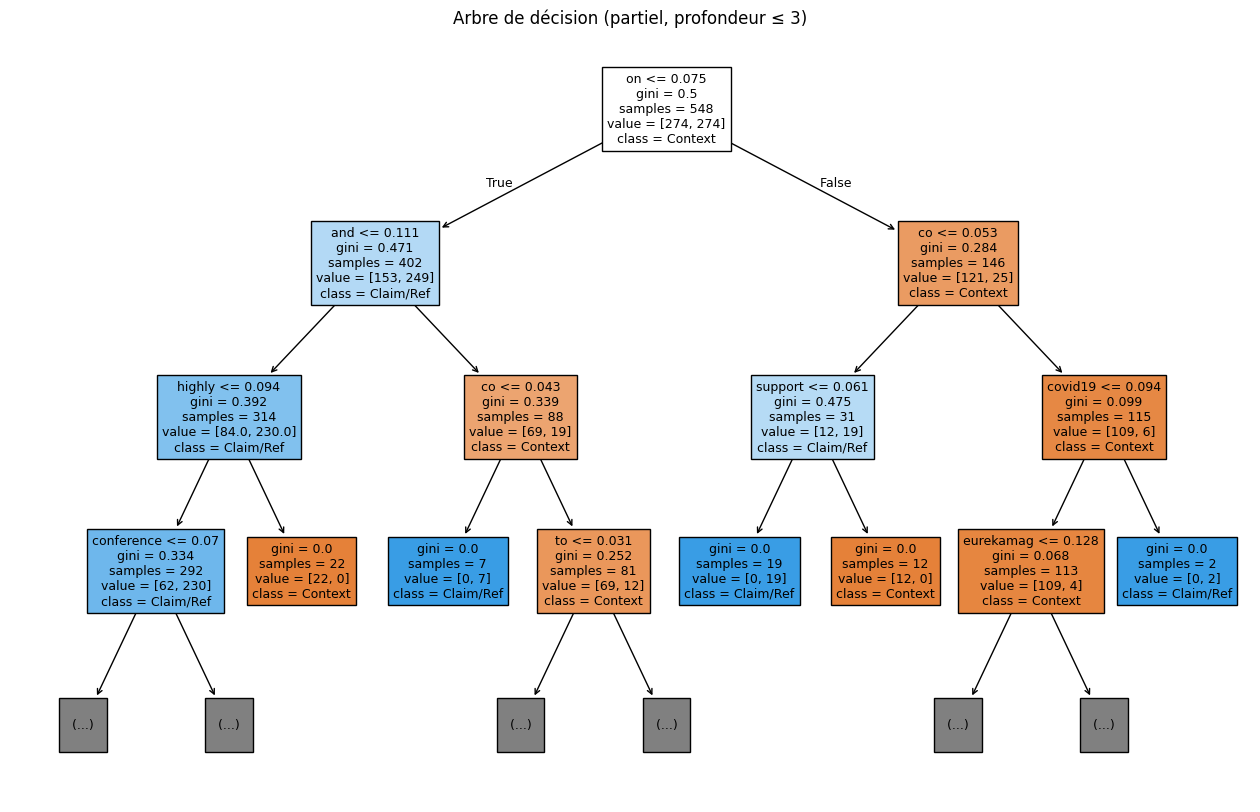

In [ ]:
# Imports (certains sont déjà là)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Charger les données
data = pd.read_csv("scitweets_export.tsv", sep='\t')
data.columns = data.columns.str.strip()

# Créer la colonne cible
data = data[data["science_related"] == 1].copy()
data["claim_or_ref"] = ((data["scientific_claim"] == 1) | (data["scientific_reference"] == 1)).astype(int)

# Séparation des données
X = data["text"]
y = data["claim_or_ref"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rééquilibrage de l'entraînement
train_df = pd.DataFrame({'text': X_train, 'label': y_train})
majority = train_df[train_df.label == 1]
minority = train_df[train_df.label == 0]
minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)
train_df_balanced = pd.concat([majority, minority_upsampled]).sample(frac=1, random_state=42)

# Pipeline
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(train_df_balanced["text"])
X_test_vec = vectorizer.transform(X_test)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_vec, train_df_balanced["label"])
y_pred = model.predict(X_test_vec)

# Évaluation : matrice de confusion avec labels
print("Accuracy:", accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Context", "Claim/Ref"], yticklabels=["Context", "Claim/Ref"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Context", "Claim/Ref"]))

# Affichage des erreurs de classification
X_test_df = pd.DataFrame({'text': X_test, 'true': y_test, 'pred': y_pred}, index=X_test.index)
misclassified = X_test_df[X_test_df['true'] != X_test_df['pred']]
print("\nExemples de tweets mal classés :")
print(misclassified.head()[['text', 'true', 'pred']])

# Mots les plus importants
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_indices = np.argsort(importances)[::-1][:20]
top_features = feature_names[top_indices]
top_values = importances[top_indices]

plt.figure(figsize=(10,6))
sns.barplot(x=top_values, y=top_features, palette="viridis")
plt.title("Top 20 mots les plus importants")
plt.xlabel("Importance")
plt.ylabel("Mot")
plt.show()

# Visualisation partielle de l’arbre
plt.figure(figsize=(16, 10))
plot_tree(model, max_depth=3, filled=True, feature_names=vectorizer.get_feature_names_out(), class_names=["Context", "Claim/Ref"])
plt.title("Arbre de décision (partiel, profondeur ≤ 3)")
plt.show()


In [ ]:
pip install pandas scikit-learn

✅ Accuracy: 0.6133333333333333

📊 Classification Report:
               precision    recall  f1-score   support

       CLAIM       0.94      0.61      0.74        54
     CONTEXT       0.25      0.43      0.32         7
         REF       0.36      0.71      0.48        14

    accuracy                           0.61        75
   macro avg       0.52      0.58      0.51        75
weighted avg       0.77      0.61      0.65        75


🧩 Confusion Matrix:
 [[33 15  6]
 [ 1 10  3]
 [ 1  3  3]]


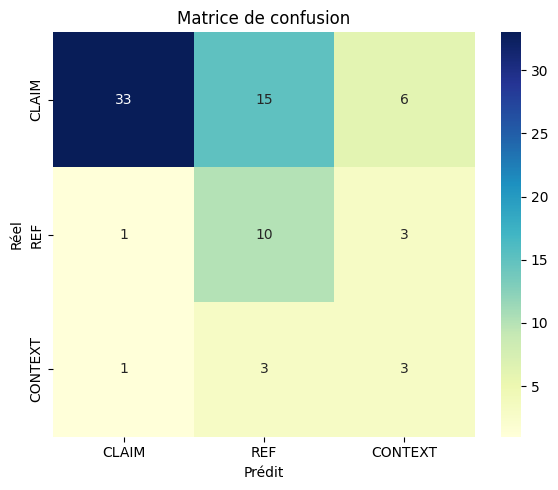


🔎 Tweets mal classés :
                                                  text   true     pred
506  RT BBCScienceNews: Database helps plant 'right...  CLAIM      REF
99   What will digital life look like in a decade? ...    REF  CONTEXT
193  Did you know that what you eat can affect your...  CLAIM      REF
367  #Severe fibromyalgia symptoms linked to obesit...  CLAIM      REF
869  BioTechnology – Efficient Stem Cells Can Grow ...  CLAIM      REF


<ipython-input-29-f2a32130c09d>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scores, y=top_words, palette="mako")


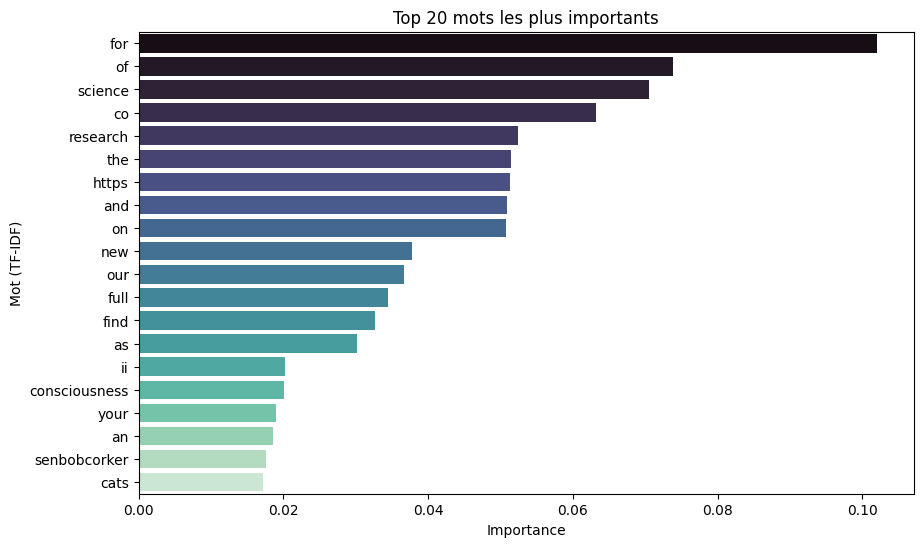

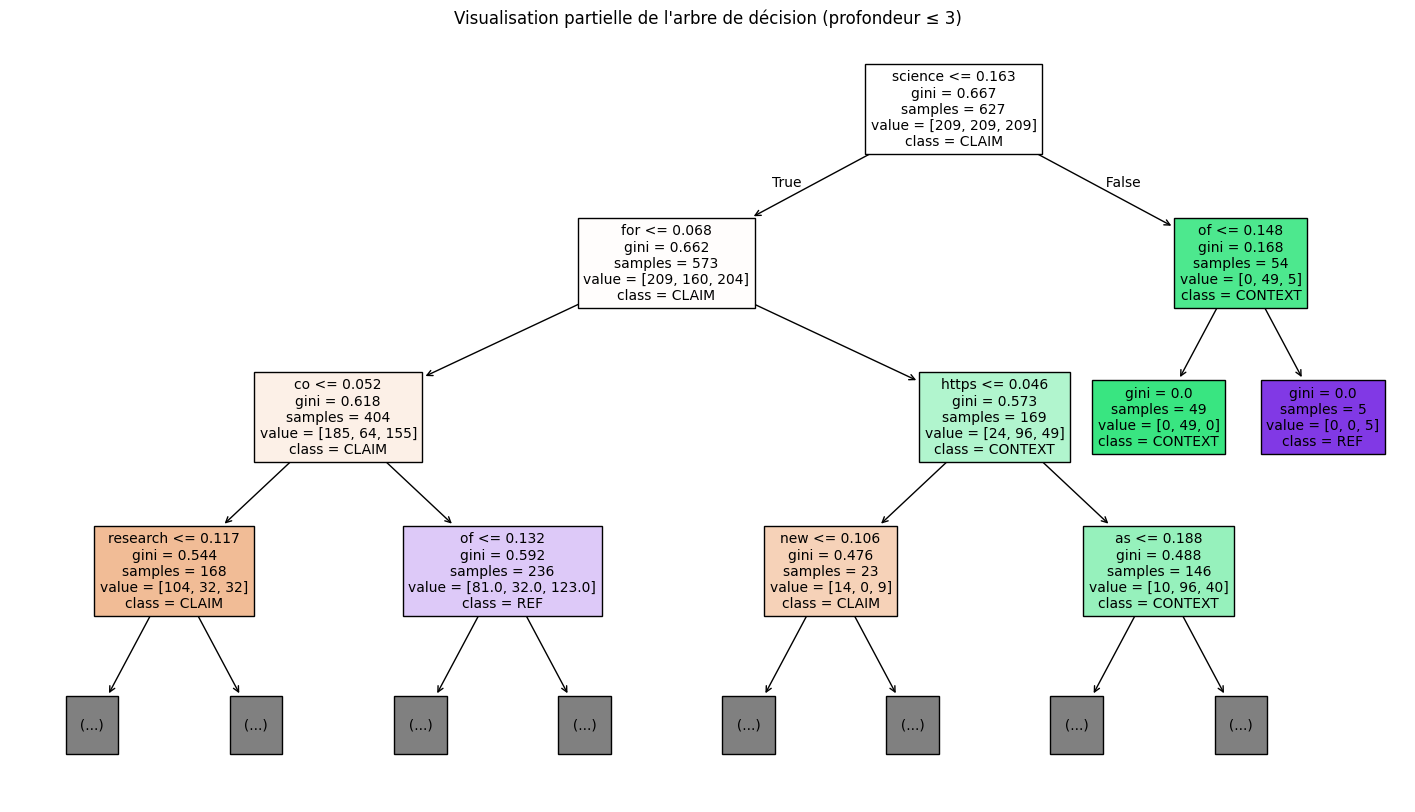

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === Étape 1 : filtrage et étiquetage ===
sci_tweets = data[data['science_related'] == 1].copy()
sci_tweets['category'] = 'CONTEXT'
sci_tweets.loc[sci_tweets['scientific_reference'] == 1, 'category'] = 'REF'
sci_tweets.loc[sci_tweets['scientific_claim'] == 1, 'category'] = 'CLAIM'

# === Étape 2 : split
X_train, X_test, y_train, y_test = train_test_split(
    sci_tweets['text'],
    sci_tweets['category'],
    test_size=0.2,
    random_state=42
)

# === Étape 3 : équilibrage
def balance_multiclass(df, text_col, label_col):
    classes = df[label_col].unique()
    max_size = df[label_col].value_counts().max()
    balanced_frames = [
        resample(df[df[label_col] == cls], replace=True, n_samples=max_size, random_state=42)
        for cls in classes
    ]
    return pd.concat(balanced_frames).sample(frac=1, random_state=42).reset_index(drop=True)

train_df = pd.DataFrame({'text': X_train, 'category': y_train})
train_df_balanced = balance_multiclass(train_df, text_col='text', label_col='category')

# === Étape 4 : vectorisation
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(train_df_balanced['text'])
X_test_vec = vectorizer.transform(X_test)

# === Étape 5 : entraînement
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_vec, train_df_balanced['category'])

# === Étape 6 : prédictions et évaluation
y_pred = model.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=["CLAIM", "REF", "CONTEXT"])
print("\n🧩 Confusion Matrix:\n", cm)

# 🔍 Matrice de confusion affichée joliment
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=["CLAIM", "REF", "CONTEXT"], yticklabels=["CLAIM", "REF", "CONTEXT"])
plt.title("Matrice de confusion")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.tight_layout()
plt.show()

# ❌ Affichage des erreurs de classification
X_test_df = pd.DataFrame({'text': X_test, 'true': y_test, 'pred': y_pred})
errors = X_test_df[X_test_df['true'] != X_test_df['pred']]
print("\n🔎 Tweets mal classés :")
print(errors.head(5)[['text', 'true', 'pred']])

# 📊 Mots les plus importants
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
top_idx = np.argsort(importances)[::-1][:20]
top_words = feature_names[top_idx]
top_scores = importances[top_idx]

plt.figure(figsize=(10,6))
sns.barplot(x=top_scores, y=top_words, palette="mako")
plt.title("Top 20 mots les plus importants")
plt.xlabel("Importance")
plt.ylabel("Mot (TF-IDF)")
plt.show()

# 🌳 Visualisation de l’arbre partiel
plt.figure(figsize=(18, 10))
plot_tree(model, max_depth=3, filled=True, class_names=model.classes_, feature_names=vectorizer.get_feature_names_out(), fontsize=10)
plt.title("Visualisation partielle de l'arbre de décision (profondeur ≤ 3)")
plt.show()


# Classification scientifique et non scientifique

In [ ]:
# 1. Nettoyage
data = clean_data(data, 'text')

# 2. Séparation features / labels
X = data[['text']]
y = data['science_related']

# 3. Split train / test
from sklearn.model_selection import train_test_split
X_train_text, X_test_text, y_train, y_test = train_test_split(X['text'], y, test_size=0.2, random_state=42)

# 4. Vectorisation TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_text)
X_test = vectorizer.transform(X_test_text)

# 5. Entraînement du modèle
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# 6. Prédictions et évaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[75]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        75

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
